In [1]:
import numpy as np

In [2]:
import pandas as pd

/Users/mess/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/mess/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:

import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('niftybank.csv')


In [4]:
average_close_by_date = df.groupby('timestamp')['close'].mean()

In [6]:
print(average_close_by_date)

timestamp
2017-01-02 09:15:00+05:30    18181.20
2017-01-02 09:16:00+05:30    18184.45
2017-01-02 09:17:00+05:30    18133.80
2017-01-02 09:18:00+05:30    18138.95
2017-01-02 09:19:00+05:30    18124.30
                               ...   
2017-10-31 15:25:00+05:30    25029.00
2017-10-31 15:26:00+05:30    25028.25
2017-10-31 15:27:00+05:30    25031.15
2017-10-31 15:28:00+05:30    25037.80
2017-10-31 15:29:00+05:30    25047.85
Name: close, Length: 76935, dtype: float64


In [82]:
# Calculate daily returns
df['Daily_Return'] = df['close'].pct_change(fill_method=None) * 100

# Get maximum and minimum values
max_return = df['Daily_Return'].max()
min_return = df['Daily_Return'].min()

print("Maximum Daily Return:", max_return)
print("Minimum Daily Return:", min_return)


Maximum Daily Return: 3.69378420341977
Minimum Daily Return: -1.2279263656098327


In [89]:
# Creating a column indicating if the price increased or decreased compared to the previous day
df['Price_Direction'] = np.where(df['close'] > df['close'].shift(1), 'Up', 'Down')

# Counting the number of "Up" and "Down" occurrences
direction_counts = df['Price_Direction'].value_counts()

print("Number of Up occurrences:", direction_counts.get('Up', 0))
print("Number of Down occurrences:", direction_counts.get('Down', 0))


Number of Up occurrences: 38336
Number of Down occurrences: 38599


In [23]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
# Extracting year, month, day, and time
df['Year'] = df['timestamp'].dt.year
df['Month'] = df['timestamp'].dt.month
df['Day'] = df['timestamp'].dt.day
df['Time'] = df['timestamp'].dt.time
# Printing the DataFrame with the new columns
print(df[['Year', 'Month', 'Day', 'Time']])

       Year  Month  Day      Time
0      2017      1    2  09:15:00
1      2017      1    2  09:16:00
2      2017      1    2  09:17:00
3      2017      1    2  09:18:00
4      2017      1    2  09:19:00
...     ...    ...  ...       ...
76930  2017     10   31  15:25:00
76931  2017     10   31  15:26:00
76932  2017     10   31  15:27:00
76933  2017     10   31  15:28:00
76934  2017     10   31  15:29:00

[76935 rows x 4 columns]


In [24]:
# Calculating the average closing price for each month
monthly_avg_close = df.groupby(df['timestamp'].dt.month)['close'].mean()

In [25]:
print(monthly_avg_close)

timestamp
1     18794.505048
2     20381.869087
3     20982.468309
4     21741.017985
5     22812.818764
6     23480.356800
7     24008.567346
8     24397.854997
9     24500.649702
10    24470.514154
Name: close, dtype: float64


In [28]:
# Creating a column indicating if the price increased or decreased compared to the previous day
df['Price_Direction'] = np.where(df['close'] > df['close'].shift(1), 'Up', 'Down')

In [29]:
print(df['Price_Direction'])

0        Down
1          Up
2        Down
3          Up
4        Down
         ... 
76930    Down
76931    Down
76932      Up
76933      Up
76934      Up
Name: Price_Direction, Length: 76935, dtype: object


In [36]:
# Calculating the average closing price for each month
monthly_avg_close = df.groupby(df['timestamp'].dt.month)['close'].mean()
print(monthly_avg_close)

timestamp
1     18794.505048
2     20381.869087
3     20982.468309
4     21741.017985
5     22812.818764
6     23480.356800
7     24008.567346
8     24397.854997
9     24500.649702
10    24470.514154
Name: close, dtype: float64


In [38]:
# Filtering records for the month with the highest average closing price
max_avg_close_month = monthly_avg_close.idxmax()
max_avg_close_month_data = df[df['timestamp'].dt.month == max_avg_close_month]
print(max_avg_close_month_data)

                      timestamp      open      high       low     close  \
61875 2017-09-01 09:15:00+05:30  24389.20  24389.20  24329.95  24331.90   
61876 2017-09-01 09:16:00+05:30  24331.65  24348.60  24330.90  24344.40   
61877 2017-09-01 09:17:00+05:30  24347.45  24349.40  24330.95  24334.25   
61878 2017-09-01 09:18:00+05:30  24333.75  24338.15  24327.70  24328.70   
61879 2017-09-01 09:19:00+05:30  24332.35  24338.05  24327.70  24338.05   
...                         ...       ...       ...       ...       ...   
69745 2017-09-29 15:25:00+05:30  24060.05  24060.65  24055.35  24057.55   
69746 2017-09-29 15:26:00+05:30  24055.85  24058.40  24054.20  24055.55   
69747 2017-09-29 15:27:00+05:30  24055.60  24058.95  24046.95  24052.05   
69748 2017-09-29 15:28:00+05:30  24055.80  24059.85  24046.85  24048.50   
69749 2017-09-29 15:29:00+05:30  24047.15  24053.25  24024.05  24026.40   

       volume  Price_Range  Daily_Return Price_Direction  Rolling_Avg_Volume  \
61875     0.0      

In [39]:
df['Cumulative_Returns'] = (1 + df['Daily_Return'] / 100).cumprod() - 1
print(df['Cumulative_Returns'])

0             NaN
1        0.000179
2       -0.002607
3       -0.002324
4       -0.003130
           ...   
76930    0.375809
76931    0.375768
76932    0.375927
76933    0.376293
76934    0.376845
Name: Cumulative_Returns, Length: 76935, dtype: float64


In [40]:
# Identifying the date with the highest cumulative returns
max_cumulative_returns_date = df.loc[df['Cumulative_Returns'].idxmax(), 'timestamp']
print(max_cumulative_returns_date)

2017-08-02 10:31:00+05:30


In [99]:
min_cumulative_returns_date = df.loc[df['Cumulative_Returns'].idxmin(), 'timestamp']
print(min_cumulative_returns_date)


2017-01-03 09:24:00+05:30


In [100]:
# Finding the maximum cumulative returns value
min_cumulative_returns_value = df['Cumulative_Returns'].min()

print("Minimum Cumulative Returns:", min_cumulative_returns_value)

Minimum Cumulative Returns: -0.018326623105185624


In [44]:
print(hourly_avg_price )

timestamp
9     22562.657691
10    22561.539870
11    22569.172160
12    22562.641581
13    22564.700663
14    22573.903236
15    22573.587537
18    24196.820000
19    24014.096667
Name: close, dtype: float64


In [57]:
# Calculating the rate of change (ROC) indicator
n = 12  # Period for ROC calculation
df['ROC'] = (df['close'] - df['close'].shift(n)) / df['close'].shift(n) * 100



In [58]:
# Identifying overbought and oversold conditions using ROC
overbought_threshold = 10
oversold_threshold = -10
df['Overbought'] = np.where(df['ROC'] > overbought_threshold, 1, 0)
df['Oversold'] = np.where(df['ROC'] < oversold_threshold, 1, 0)



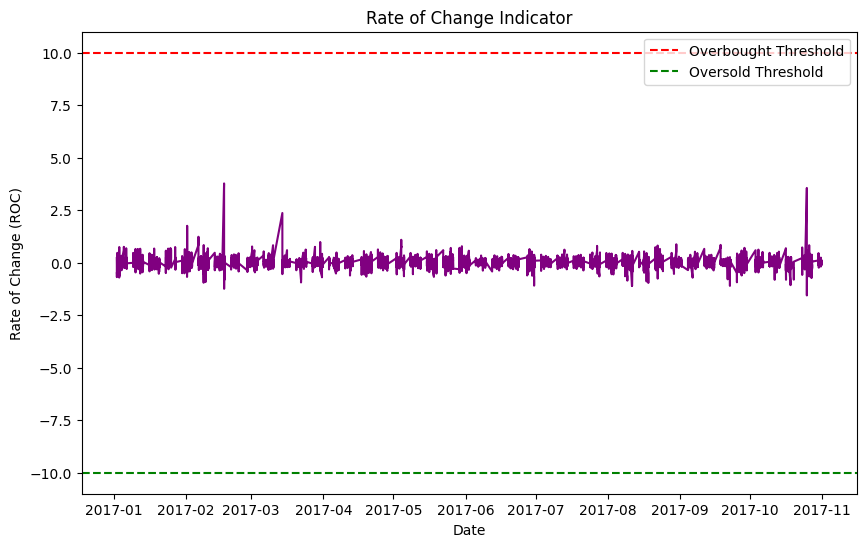

In [59]:
# Plotting the ROC indicator
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['ROC'], color='purple')
plt.axhline(y=overbought_threshold, color='red', linestyle='--', label='Overbought Threshold')
plt.axhline(y=oversold_threshold, color='green', linestyle='--', label='Oversold Threshold')
plt.xlabel('Date')
plt.ylabel('Rate of Change (ROC)')
plt.title('Rate of Change Indicator')
plt.legend()
plt.show()

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
76930    25020.0875
76931    25021.1875
76932    25021.6525
76933    25022.8750
76934    25024.8375
Name: Moving_Average, Length: 76935, dtype: float64


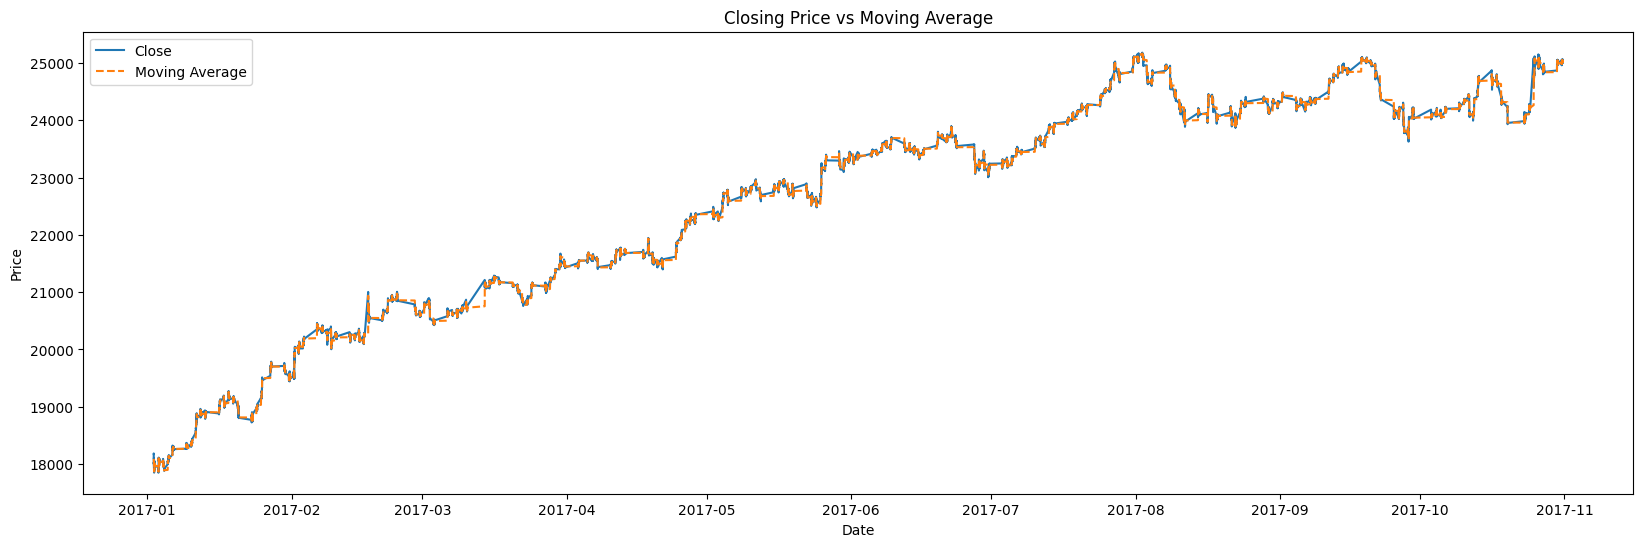

In [101]:
# Calculating the moving average of the closing price
df['Moving_Average'] = df['close'].rolling(window=20).mean()
print(df['Moving_Average'])

# Identifying dates where the closing price is above the moving average
df['Above_MA'] = np.where(df['close'] > df['Moving_Average'], True, False)

# Plotting the closing price and moving average
plt.figure(figsize=(20, 6))
plt.plot(df['timestamp'], df['close'], label='Close')
plt.plot(df['timestamp'], df['Moving_Average'], label='Moving Average', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Closing Price vs Moving Average')
plt.legend()
plt.show()

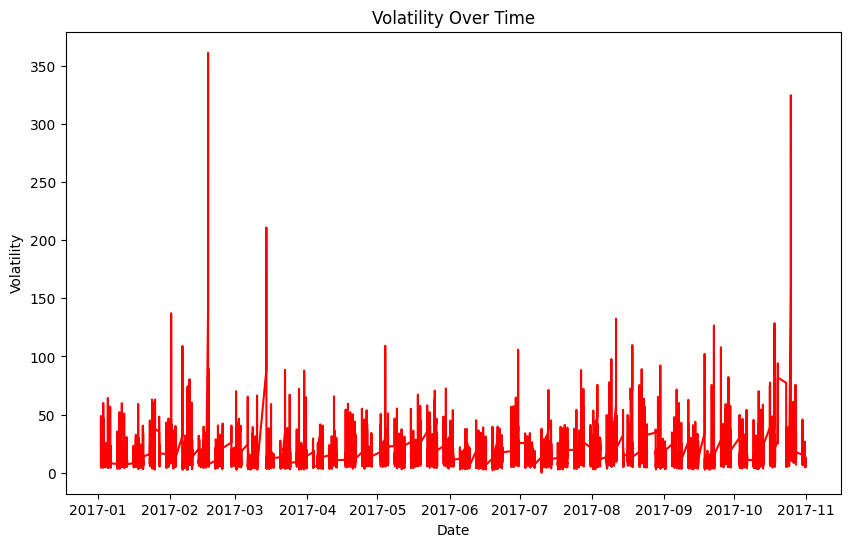

In [80]:
# Calculating the 30-day rolling volatility of the closing price
df['Volatility'] = df['close'].rolling(window=30).std()

# Identifying dates with the highest volatility
max_volatility_date = df.loc[df['Volatility'].idxmax(), 'timestamp']

# Filtering records for the date with the highest volatility
max_volatility_data = df[df['timestamp'] == max_volatility_date]

# Plotting the volatility over time
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['Volatility'], color='red')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Volatility Over Time')
plt.show()